# Plotting Functionality

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pytomography.io.SPECT import dicom
from pytomography.utils import plot_utils

Change the the save path where you downloaded the tutorial data

In [2]:
save_path = '/disk1/pytomography_tutorial_data'

We'll start by opening up a CT image, and a reconstructed SPECT image from the DICOM multibed tutorial:

In [3]:
path_CT = os.path.join(save_path, 'dicom_multibed_tutorial', 'CT')
files_CT = [os.path.join(path_CT, file) for file in os.listdir(path_CT)]
path_SPECT = os.path.join(save_path, 'dicom_multibed_tutorial', 'pytomo_recon')
file_SPECT = os.path.join(path_SPECT, os.listdir(path_SPECT)[0])

To plot images on top of eachother, we need both the images and the associated affine matrices:

In [4]:
affine_SPECT = dicom._get_affine_single_file(file_SPECT)
affine_CT = dicom._get_affine_multifile(files_CT)
SPECT = dicom.open_singlefile(file_SPECT)
CT = dicom.open_multifile(files_CT)

Now we provide dictionaries of arguments for the `matplotlib.pyplot.imshow` function for each of the two images:

In [5]:
SPECT_imshow_kwargs = {
    'cmap': plot_utils.pet_cmap,
    'interpolation': 'Gaussian',
    'alpha': 0.6,
    'vmin': 0,
    'vmax': 350,
    'zorder': 1, # this will ensure SPECT is on top of CT
    'origin': 'lower'
}
CT_imshow_kwargs = {
    'cmap': 'Greys_r',
    'interpolation': 'Gaussian',
    'vmin': -150, # HU
    'vmax': 475, # HU
    'zorder': 0,
    'origin': 'lower'
}

We can then plot the 3 slices as follows:

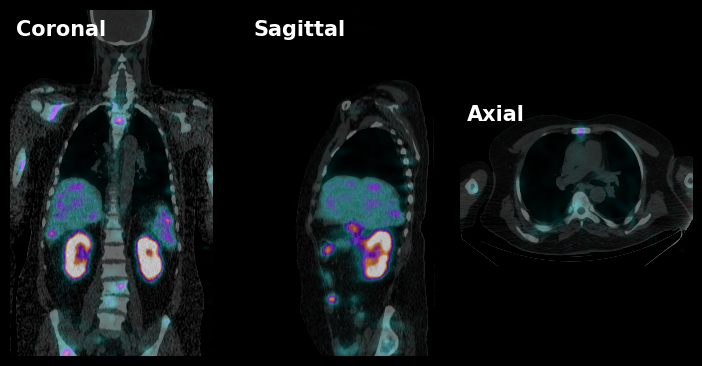

In [6]:
fig, ax = plt.subplots(1,3,figsize=(9,4.5), gridspec_kw={'wspace':0.0}, facecolor='k')
plt.sca(ax[0])
plot_utils.dual_imshow_coronal(
    im1 = SPECT,
    im2 = CT,
    im1_idx = 80,
    affine1 = affine_SPECT,
    affine2 = affine_CT,
    imshow1_kwargs=SPECT_imshow_kwargs,
    imshow2_kwargs=CT_imshow_kwargs,
)
plt.xlim(-200,220)
plt.ylim(-350,370)
plt.axis('off')
plt.text(0.03, 0.97, 'Coronal', color='white', fontsize=15, fontweight='bold', transform=plt.gca().transAxes, ha='left', va='top')

plt.sca(ax[1])
plot_utils.dual_imshow_sagittal(
    im1 = SPECT,
    im2 = CT,
    im1_idx = 50,
    affine1 = affine_SPECT,
    affine2 = affine_CT,
    imshow1_kwargs=SPECT_imshow_kwargs,
    imshow2_kwargs=CT_imshow_kwargs,
)
plt.xlim(-200,200)
plt.ylim(-350,370)
plt.axis('off')
plt.text(0.03, 0.97, 'Sagittal', color='white', fontsize=15, fontweight='bold', transform=plt.gca().transAxes, ha='left', va='top')

plt.sca(ax[2])
plot_utils.dual_imshow_axial(
    im1 = SPECT,
    im2 = CT,
    im1_idx = 117,
    affine1 = affine_SPECT,
    affine2 = affine_CT,
    imshow1_kwargs=SPECT_imshow_kwargs,
    imshow2_kwargs=CT_imshow_kwargs,
)
plt.xlim(-200,220)
plt.ylim(200,-100)
plt.axis('off')
plt.text(0.03, 0.97, 'Axial', color='white', fontsize=15, fontweight='bold', transform=plt.gca().transAxes, ha='left', va='top')
plt.show()

Often, I like using a further customized PET cmap that changes with transparency for lower value. We can do this by modiying the PET colormap. I've found that this function tends to work well:

In [7]:
def cmap_f(x,a):
    return (1-np.exp(-x/a))/(1+np.exp(-x/a))
x = np.linspace(0,1,256)
colors = plot_utils.pet_cmap(x)
colors[:, -1] = 0.8*cmap_f(x, a=3e-2) # this value works well
new_pet_cmap = mcolors.LinearSegmentedColormap.from_list('NewColormap', colors)

In [8]:
SPECT_imshow_kwargs = {
    'cmap': new_pet_cmap,
    'interpolation': 'Gaussian',
    'alpha': 0.8, # Change the alpha higher now for more visibilty
    'vmin': 0,
    'vmax': 350,
    'zorder': 1,
    'origin': 'lower'
}
CT_imshow_kwargs = {
    'cmap': 'Greys_r',
    'interpolation': 'Gaussian',
    'vmin': -150, # HU
    'vmax': 475, # HU
    'zorder': 0,
    'origin': 'lower'
}

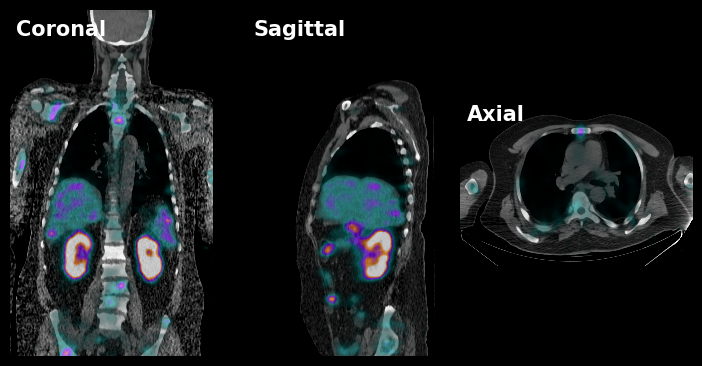

In [9]:
fig, ax = plt.subplots(1,3,figsize=(9,4.5), gridspec_kw={'wspace':0.0}, facecolor='k')
plt.sca(ax[0])
plot_utils.dual_imshow_coronal(
    im1 = SPECT,
    im2 = CT,
    im1_idx = 80,
    affine1 = affine_SPECT,
    affine2 = affine_CT,
    imshow1_kwargs=SPECT_imshow_kwargs,
    imshow2_kwargs=CT_imshow_kwargs,
)
plt.xlim(-200,220)
plt.ylim(-350,370)
plt.axis('off')
plt.text(0.03, 0.97, 'Coronal', color='white', fontsize=15, fontweight='bold', transform=plt.gca().transAxes, ha='left', va='top')

plt.sca(ax[1])
plot_utils.dual_imshow_sagittal(
    im1 = SPECT,
    im2 = CT,
    im1_idx = 50,
    affine1 = affine_SPECT,
    affine2 = affine_CT,
    imshow1_kwargs=SPECT_imshow_kwargs,
    imshow2_kwargs=CT_imshow_kwargs,
)
plt.xlim(-200,200)
plt.ylim(-350,370)
plt.axis('off')
plt.text(0.03, 0.97, 'Sagittal', color='white', fontsize=15, fontweight='bold', transform=plt.gca().transAxes, ha='left', va='top')

plt.sca(ax[2])
plot_utils.dual_imshow_axial(
    im1 = SPECT,
    im2 = CT,
    im1_idx = 117,
    affine1 = affine_SPECT,
    affine2 = affine_CT,
    imshow1_kwargs=SPECT_imshow_kwargs,
    imshow2_kwargs=CT_imshow_kwargs,
)
plt.xlim(-200,220)
plt.ylim(200,-100)
plt.axis('off')
plt.text(0.03, 0.97, 'Axial', color='white', fontsize=15, fontweight='bold', transform=plt.gca().transAxes, ha='left', va='top')
plt.show()